### Problem Statement : 

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. So we need to forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately.

### Variable | Definition

record_ID             =  Unique ID for each week store sku combination

week                  =  Starting Date of the week

store_id              =  Unique ID for each store (no numerical order to be assumed)

sku_id                =  Unique ID for each product (no numerical order to be assumed)

total_price           =  Sales Price of the product

base_price            =  Base price of the product

is_featured_sku       =  Was part of the featured item of the week

is_display_sku        =  Product was on display at a prominent place at the store

units_sold            =  (Target) Total Units sold for that week-store-sku combination


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing csv file of train data

train =pd.read_csv('train_.csv')
train.head(5)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [3]:
#importing csv file of test data

test =pd.read_csv('test_.csv')
test.head(5)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [4]:
# Number of data-points and features

print('Shape of Train data: ', train.shape)
print('Shape of Test data: ', test.shape)

Shape of Train data:  (150150, 9)
Shape of Test data:  (13860, 8)


In [5]:
#data types of each feature and missing values of train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [6]:
#data types of each feature and missing values of test data

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [7]:
# There is no null values in test data

In [8]:
#Checking null values in train data

train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [9]:
# there is  only one null value in the feature total_price

<AxesSubplot:xlabel='total_price', ylabel='Density'>

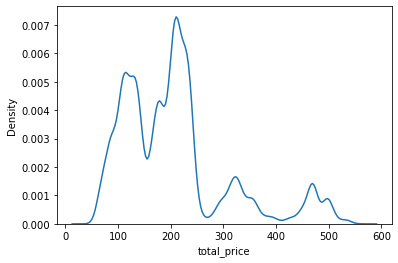

In [10]:
# Missing value treatement for total_price feature in train data
# Distribution plot

sns.distplot(train['total_price'],hist=False)

In [11]:
# since there is only one null value we can replace that with mean of the feature

train['total_price'].fillna(train['total_price'].mean(),inplace=True)

<AxesSubplot:>

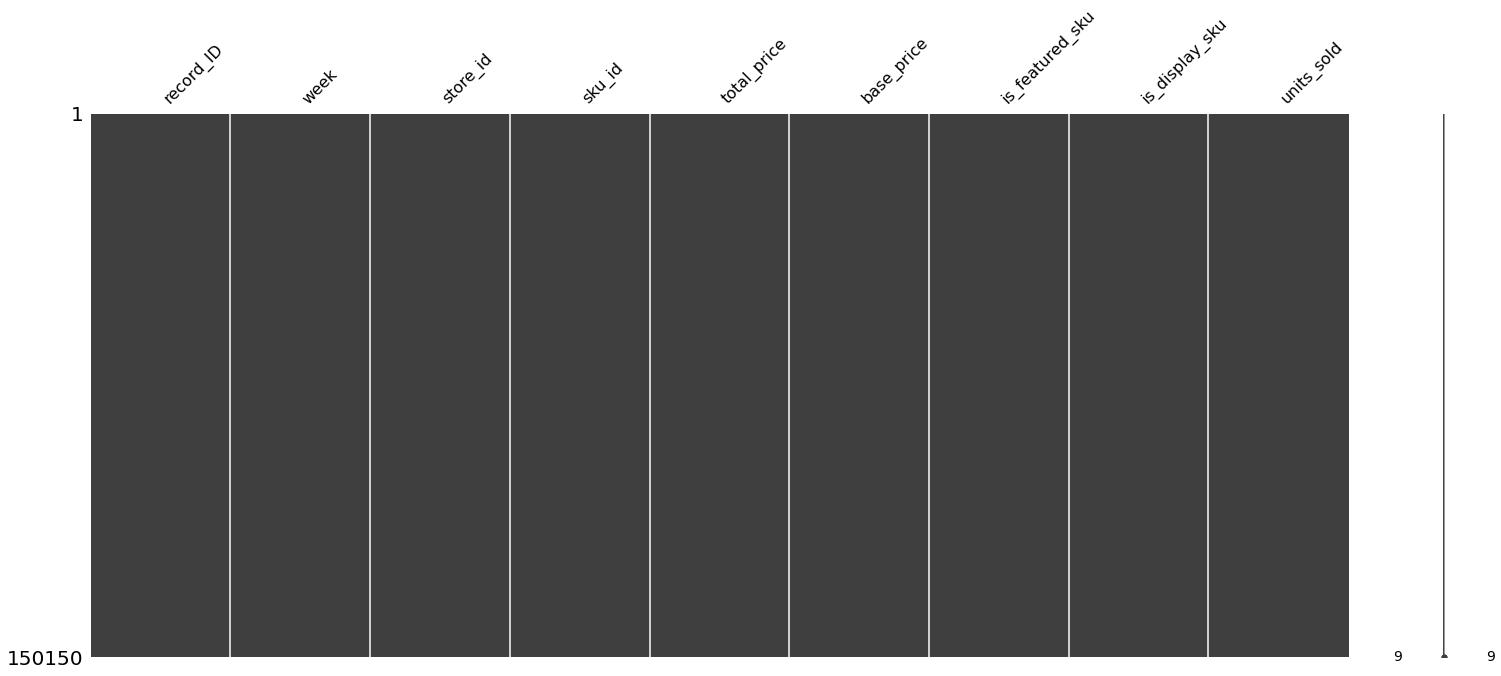

In [12]:
#distribution of missing data

msno.matrix(train)

In [13]:
#Number of unique values in all the features

train.nunique()

record_ID          150150
week                  130
store_id               76
sku_id                 28
total_price           647
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64

In [14]:
#Number of unique values in all the features

test.nunique()

record_ID          13860
week                  12
store_id              76
sku_id                28
total_price          442
base_price           370
is_featured_sku        2
is_display_sku         2
dtype: int64

In [15]:
#We can drop record_ID since it is having only unique values for all the data points

train.drop('record_ID',axis=1,inplace=True)
test.drop('record_ID',axis=1,inplace=True)

In [16]:
#changing datatype of categorical feature from int to category

train['store_id'] = train['store_id'].astype('category')
train['sku_id'] = train['sku_id'].astype('category')
train['is_featured_sku'] = train['is_featured_sku'].astype('category')
train['is_display_sku'] = train['is_display_sku'].astype('category')

test['store_id'] = test['store_id'].astype('category')
test['sku_id'] = test['sku_id'].astype('category')
test['is_featured_sku'] = test['is_featured_sku'].astype('category')
test['is_display_sku'] = test['is_display_sku'].astype('category')




In [17]:
#checking the datatypes on train 
train.dtypes

week                 object
store_id           category
sku_id             category
total_price         float64
base_price          float64
is_featured_sku    category
is_display_sku     category
units_sold            int64
dtype: object

In [18]:
#checking the datatypes on test 
test.dtypes

week                 object
store_id           category
sku_id             category
total_price         float64
base_price          float64
is_featured_sku    category
is_display_sku     category
dtype: object

# Exploratory Data Analysis 

In [20]:
print(train['units_sold'].min() , train['units_sold'].max())

1 2876


In [19]:
# Statistical summary of train
train.describe()

,total_price,base_price,units_sold
count,150150.000000,150150.000000,150150.000000
mean,206.626751,219.425927,51.674206
std,103.308172,110.961712,60.207904
min,41.325000,61.275000,1.000000
25%,130.387500,133.237500,20.000000
50%,198.075000,205.912500,35.000000
75%,233.700000,234.412500,62.000000
max,562.162500,562.162500,2876.000000


In [20]:
# Statistical summary of test
test.describe()

,total_price,base_price
count,13860.000000,13860.000000
mean,212.188874,223.922660
std,93.138162,103.429522
min,65.550000,70.537500
25%,132.525000,137.512500
50%,213.037500,218.737500
75%,241.537500,261.487500
max,562.162500,562.162500


In [21]:
# Unique values in week feature

train['week'].unique()

array(['17/01/11', '24/01/11', '31/01/11', '07/02/11', '14/02/11',
       '21/02/11', '28/02/11', '07/03/11', '14/03/11', '21/03/11',
       '28/03/11', '04/04/11', '11/04/11', '18/04/11', '25/04/11',
       '02/05/11', '09/05/11', '16/05/11', '23/05/11', '30/05/11',
       '06/06/11', '13/06/11', '20/06/11', '27/06/11', '04/07/11',
       '11/07/11', '18/07/11', '25/07/11', '01/08/11', '08/08/11',
       '15/08/11', '22/08/11', '29/08/11', '05/09/11', '12/09/11',
       '19/09/11', '26/09/11', '03/10/11', '10/10/11', '17/10/11',
       '24/10/11', '31/10/11', '07/11/11', '14/11/11', '21/11/11',
       '28/11/11', '05/12/11', '12/12/11', '19/12/11', '26/12/11',
       '02/01/12', '09/01/12', '16/01/12', '23/01/12', '30/01/12',
       '06/02/12', '13/02/12', '20/02/12', '27/02/12', '06/03/12',
       '13/03/12', '20/03/12', '27/03/12', '03/04/12', '10/04/12',
       '17/04/12', '24/04/12', '01/05/12', '08/05/12', '15/05/12',
       '22/05/12', '29/05/12', '05/06/12', '12/06/12', '19/06/

In [22]:
# Extracting new features from week feature for data analysis

train['Week_Number'] = pd.to_datetime(train['week']).dt.week

train['Month'] = pd.to_datetime(train['week']).dt.month

train['Dayofweek'] = pd.to_datetime(train['week']).dt.dayofweek

train['Is_weekend'] = np.where(train['Dayofweek'].isin([5,6]),1,0)

train['Is_month_start'] = pd.to_datetime(train['week']).dt.is_month_start

train['Is_month_end'] = pd.to_datetime(train['week']).dt.is_month_end

train['Quarter'] = pd.to_datetime(train['week']).dt.quarter 

train['Is_quarter_start'] = pd.to_datetime(train['week']).dt.is_quarter_start

train['Is_quarter_end'] = pd.to_datetime(train['week']).dt.is_quarter_end

train['Is_year_start'] = pd.to_datetime(train['week']).dt.is_year_start

train['Is_year_end'] = pd.to_datetime(train['week']).dt.is_year_end

train['Is_weekend']=train['Is_weekend'].astype('category')

test['Dayofweek'] = pd.to_datetime(test['week']).dt.dayofweek
test['Is_weekend'] = np.where(test['Dayofweek'].isin([5,6]),1,0)

test['Is_weekend']=test['Is_weekend'].astype('category')

In [23]:
train['Is_weekend'].value_counts()

0    133980
1     16170
Name: Is_weekend, dtype: int64

In [24]:
train.head(5)

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Week_Number,Month,Dayofweek,Is_weekend,Is_month_start,Is_month_end,Quarter,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end
0,17/01/11,8091,216418,99.0375,111.8625,0,0,20,3,1,0,0,False,False,1,False,False,False,False
1,17/01/11,8091,216419,99.0375,99.0375,0,0,28,3,1,0,0,False,False,1,False,False,False,False
2,17/01/11,8091,216425,133.9500,133.9500,0,0,19,3,1,0,0,False,False,1,False,False,False,False
3,17/01/11,8091,216233,133.9500,133.9500,0,0,44,3,1,0,0,False,False,1,False,False,False,False
4,17/01/11,8091,217390,141.0750,141.0750,0,0,52,3,1,0,0,False,False,1,False,False,False,False


In [25]:
print(train.Week_Number.nunique())
print(train.Month.nunique())

51
12


<AxesSubplot:xlabel='Week_Number'>

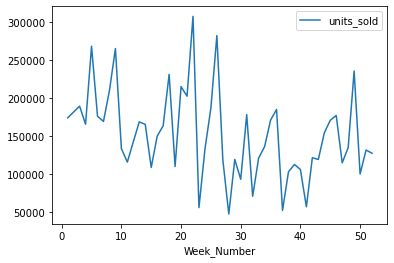

In [26]:
#Trend of Number of units sold by week

train.groupby('Week_Number').agg({'units_sold':'sum'}).plot()

<AxesSubplot:xlabel='Week_Number'>

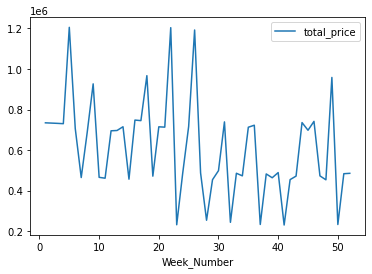

In [27]:
#Trend of sum of total_price by week

train.groupby('Week_Number').agg({'total_price':'sum'}).plot()

<AxesSubplot:ylabel='store_id'>

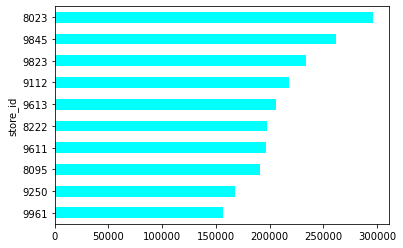

In [28]:
# Top 10 store by number of units sold

train.groupby('store_id')['units_sold'].sum()[::-1].nlargest(10)[::-1].plot(kind='barh',color='cyan')


<AxesSubplot:ylabel='sku_id'>

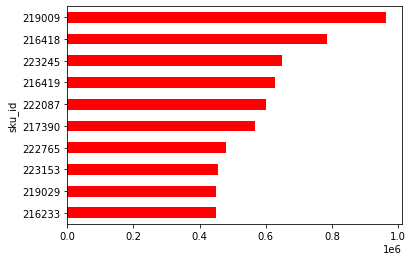

In [29]:
# Top 10 product by number of units sold

train.groupby(['sku_id'])['units_sold'].sum().nlargest(10)[::-1].plot(kind='barh',color='r')

<AxesSubplot:xlabel='Is_weekend'>

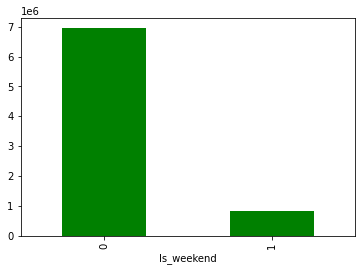

In [30]:
#Number of units sold on weekend and weekdays
# 0 == weekend
# 1 == weekday

train.groupby('Is_weekend')['units_sold'].sum().plot(kind='bar',color='g')

In [31]:
# From the above bar chart we can clearly see that on weekend number of units sold are high

<AxesSubplot:xlabel='Dayofweek'>

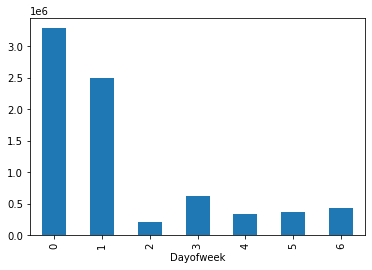

In [32]:
# Number of units sold as per day of the week

train.groupby('Dayofweek')['units_sold'].sum().plot(kind='bar')

In [33]:
# Monday or 0th day is having the highest number of units sold

In [34]:
train.drop(['Week_Number','Month','Dayofweek','Is_month_start','Is_month_end','Quarter','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end'],axis=1,inplace=True)
test.drop(['Dayofweek'],axis=1,inplace=True)

In [35]:
#creating a new data frame with only numerical features to plot the box plot

train_num= train.select_dtypes(include=['int64','float64'])
test_num= test.select_dtypes(include=['int64','float64'])

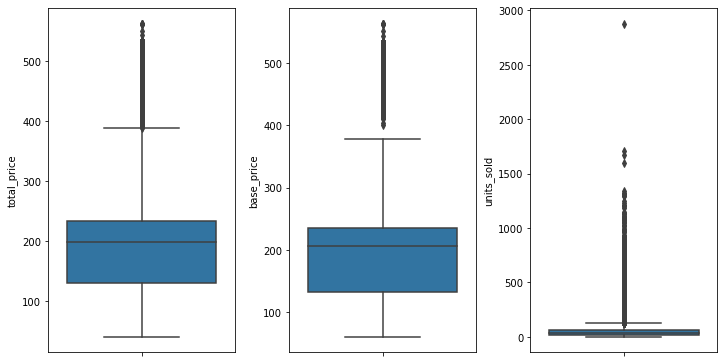

In [36]:
#Plotting box plot to understand the outliers of train data

fig,ax= plt.subplots(ncols=3,nrows=1, figsize=(10,5))
index=0
ax=ax.flatten()

for cols,value in train_num.items():
    sns.boxplot(y=cols, data=train_num , ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [37]:
#Outlier treatment by using percentile method
#total price feature
train_total_95=np.nanpercentile(train_num['total_price'],92)

train_num.loc[train_num['total_price']>train_total_95 , ['total_price']] = train_total_95
print(train_total_95)

#base price feature
train_base_95=np.percentile(train_num['base_price'],90)

train_num.loc[train_num['base_price']>train_base_95 , ['base_price']] = train_base_95
print(train_base_95)

391.1625
448.875


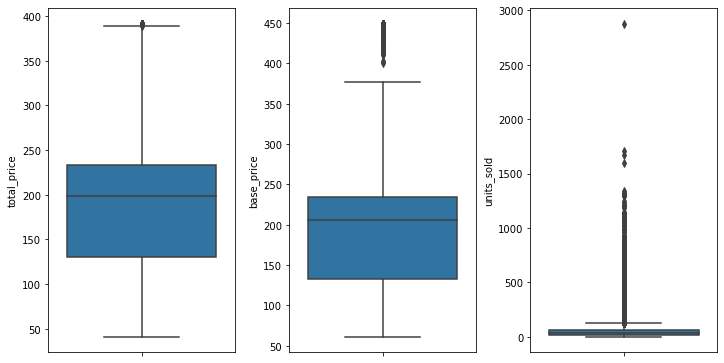

In [38]:
# plotting after doing outlier treatment

fig,ax= plt.subplots(ncols=3,nrows=1, figsize=(10,5))
index=0
ax=ax.flatten()

for cols,value in train_num.items():
    sns.boxplot(y=cols, data=train_num , ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [39]:
# We can able to see on total price the outliers are almost reduced
# But on base price there are still few outliers are there 

In [40]:
#Updating the changes in the main DataFrame (train)

total_price_95=np.nanpercentile(train['total_price'],92)

train.loc[train['total_price']>total_price_95 , ['total_price']] = total_price_95


base_price_95=np.percentile(train['base_price'],90)

train.loc[train['base_price']>base_price_95 , ['base_price']] = base_price_95

<AxesSubplot:xlabel='total_price'>

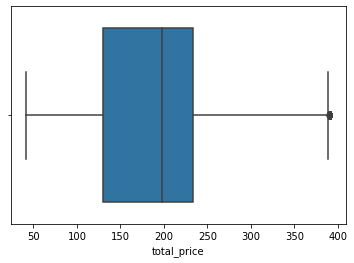

In [41]:
sns.boxplot(train['total_price'])

<AxesSubplot:xlabel='base_price'>

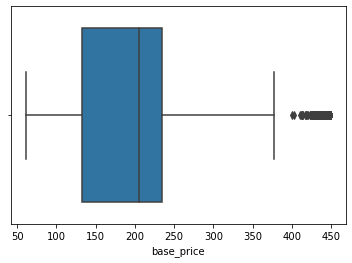

In [42]:
sns.boxplot(train['base_price'])

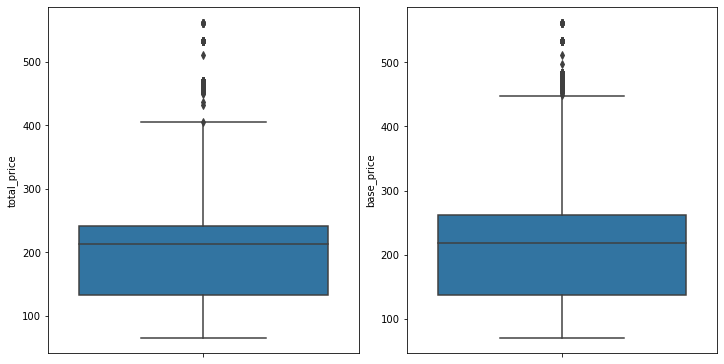

In [43]:
#Plotting box plot to understand the outliers of test data

fig,ax= plt.subplots(ncols=2,nrows=1, figsize=(10,5))
index=0
ax=ax.flatten()

for cols,value in test_num.items():
    sns.boxplot(y=cols, data=test_num , ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [44]:
#Outlier treatment by using percentile method
#total price feature

test_total_95=np.nanpercentile(test_num['total_price'],93)

test_num.loc[test_num['total_price']>test_total_95 , ['total_price']] = test_total_95
print(total_price_95)

#Base price feature

test_base_95=np.percentile(test_num['base_price'],93)

test_num.loc[test_num['base_price']>test_base_95 , ['base_price']] = test_base_95
print(test_base_95)

391.1625
401.85


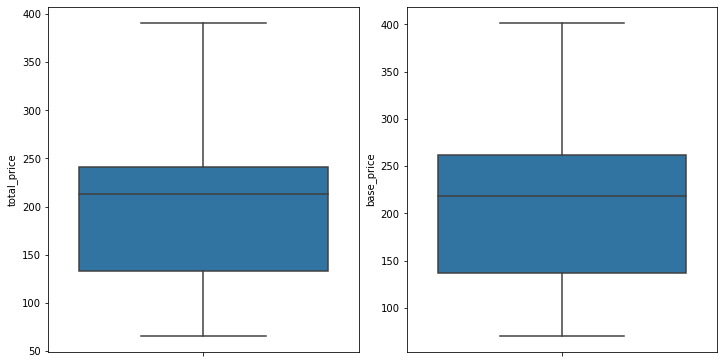

In [45]:
# plotting after doing outlier treatment

fig,ax= plt.subplots(ncols=2,nrows=1, figsize=(10,5))
index=0
ax=ax.flatten()

for cols,value in test_num.items():
    sns.boxplot(y=cols, data=test_num , ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [46]:
# We can able to see that the outliers in the both the features are completely reduced

In [47]:
# #Updating the changes in the main DataFrame (test)

total_price_95=np.nanpercentile(test['total_price'],93)

test.loc[test['total_price']>total_price_95 , ['total_price']] = total_price_95
print(total_price_95)

base_price_95=np.percentile(test['base_price'],93)

test.loc[test['base_price']>base_price_95 , ['base_price']] = base_price_95
print(base_price_95)

391.1625
401.85


<AxesSubplot:xlabel='total_price'>

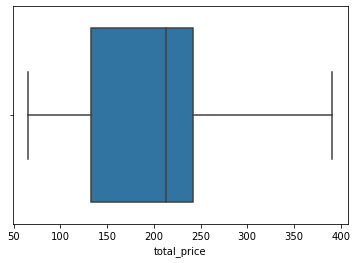

In [48]:
sns.boxplot(test['total_price'])

<AxesSubplot:xlabel='base_price'>

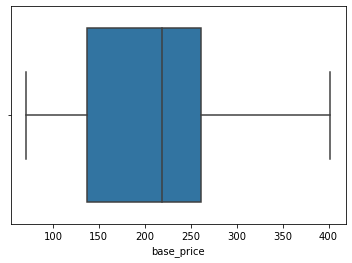

In [49]:
sns.boxplot(test['base_price'])

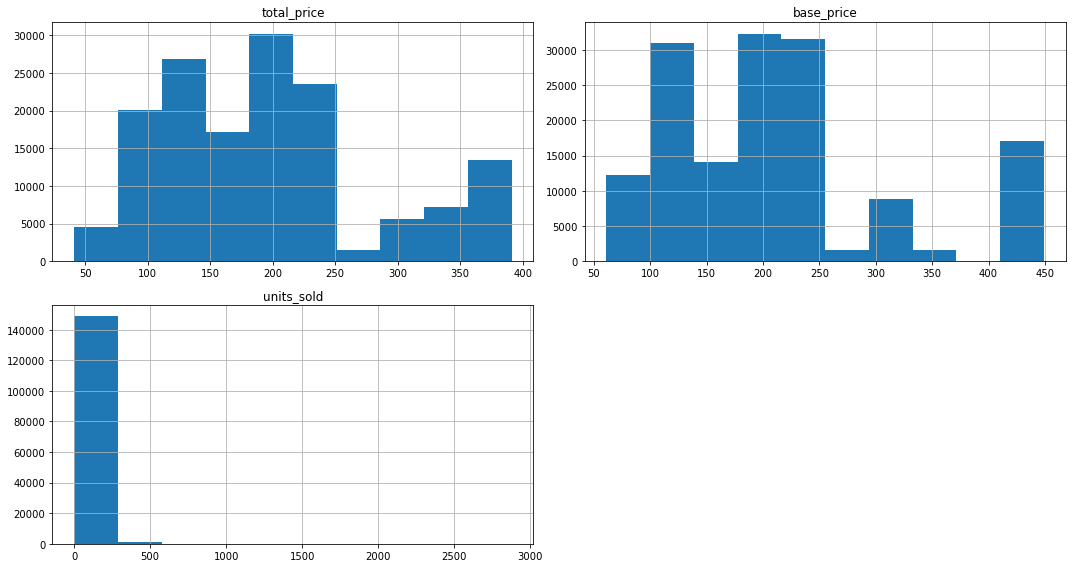

In [50]:
# ploting histogram to understand about the distribution of the train data features

train_num.hist(figsize = (15,8))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

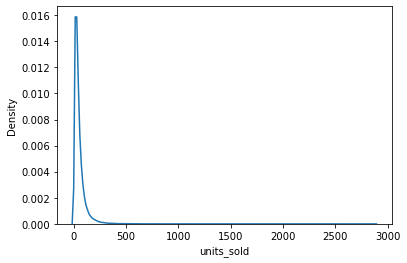

In [51]:
# Distribution plot of target varaible

sns.distplot(train['units_sold'],hist=False)

In [52]:
# The distribution of the target varaibel is right skewed or positively skewed 
# Means very fewer points have large values and most of the points have smaller value
# We can trainsform this in normal distribution by taking log of all the values

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

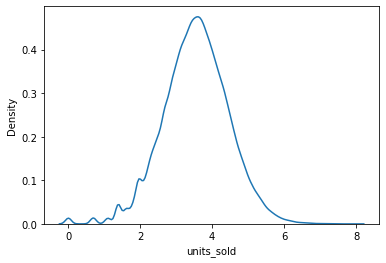

In [53]:
# Transforming target variable from log - normal distribution to normal distribution

train_num['units_sold'] = np.log(train_num['units_sold'])
train['units_sold'] = np.log(train['units_sold'])
sns.distplot(train['units_sold'],hist=False)

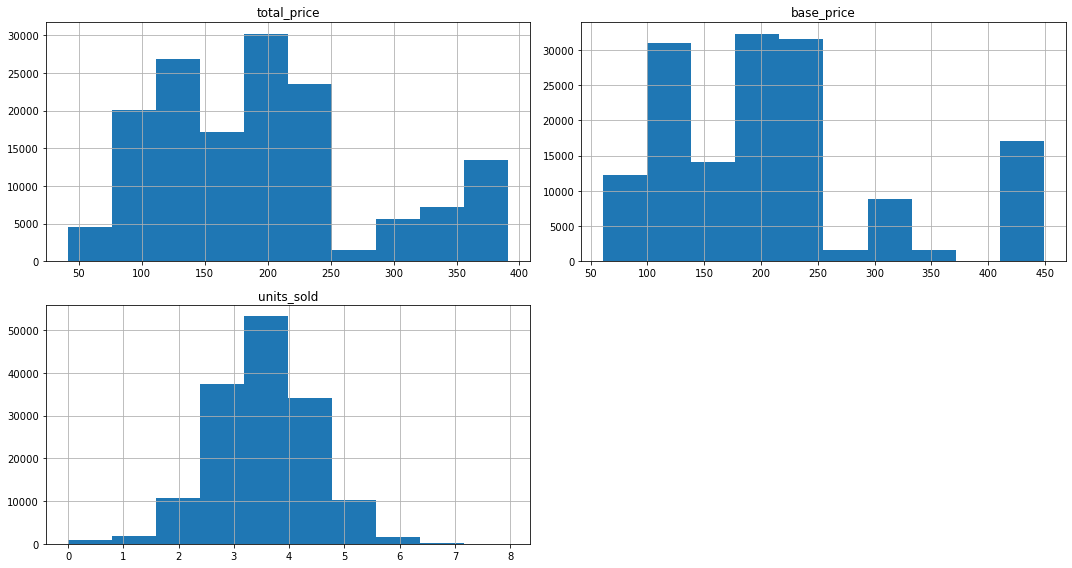

In [54]:
# ploting histogram to understand about the distribution of the train data features

train_num.hist(figsize = (15,8))
plt.tight_layout()
plt.show()

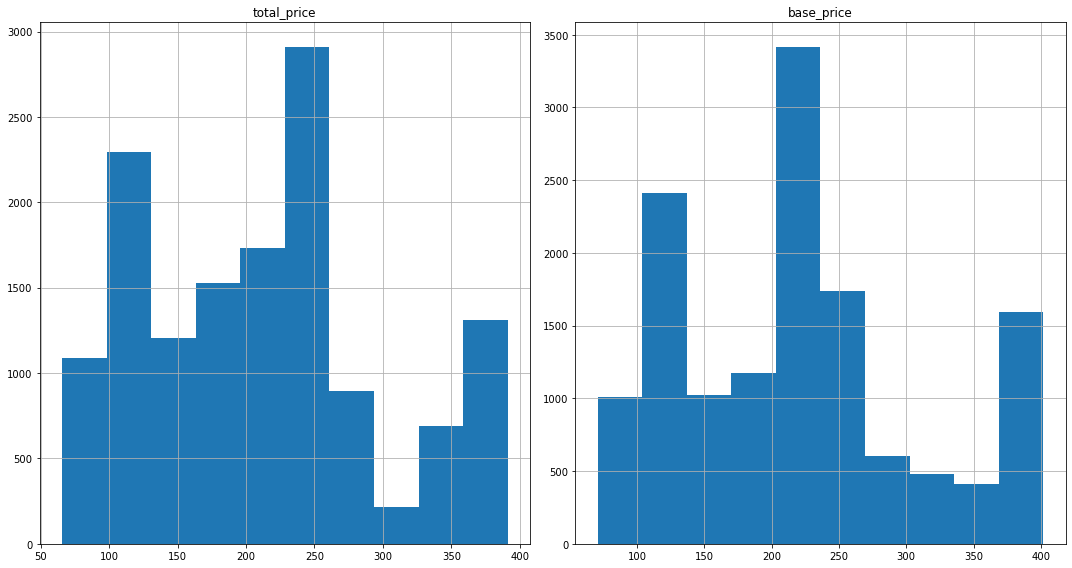

In [55]:
# ploting histogram to understand about the distribution of the test data features

test_num.hist(figsize = (15,8))
plt.tight_layout()
plt.show()

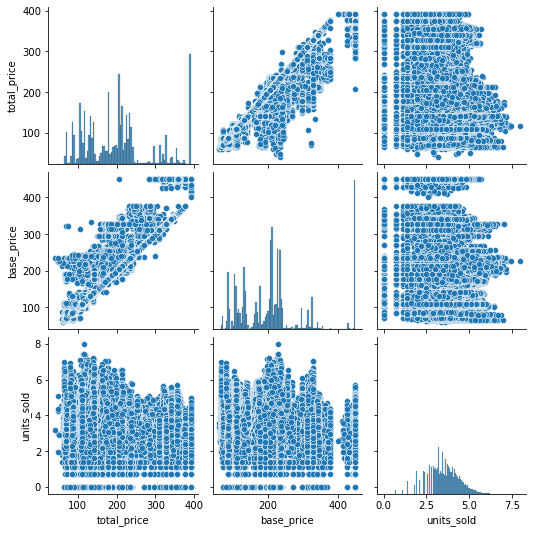

In [56]:
# Pair plot on train

sns.pairplot(train)

In [57]:
# From the pair plot we can able to see a linear relationship between independent variable total price and base price

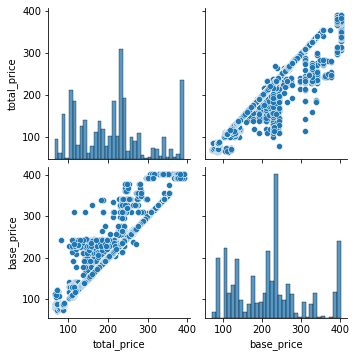

In [58]:
# Pair plot on test

sns.pairplot(test)

In [59]:
# From the pair plot we can able to see a linear relationship between independent variable total price and base price

In [60]:
# Creating new feature called difference but subtracting the base price with total price

train['Difference'] = train['base_price'] - train['total_price']

test['Difference'] = test['base_price'] - test['total_price']


In [61]:
test.isnull().sum()

week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
Is_weekend         0
Difference         0
dtype: int64

<AxesSubplot:>

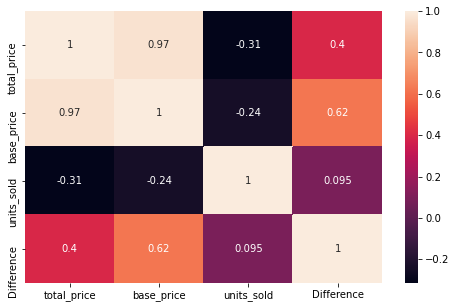

In [62]:
#Correlation heat map for train

plt.figure(figsize=(8,5))
sns.heatmap( data = train.corr(), annot = True )

<AxesSubplot:>

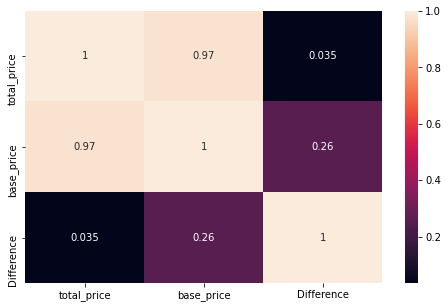

In [63]:
#Correlation heat map for test

plt.figure(figsize=(8,5))
sns.heatmap( data = test.corr(), annot = True )

In [64]:
# Since there is high correlation between two independent varaibels base price and total price on both train and test
# we can drop one feature

In [65]:
#droping base price since it has high correlation with total price

train.drop(['base_price'],axis=1,inplace=True)

test.drop(['base_price'],axis=1,inplace=True)

<AxesSubplot:>

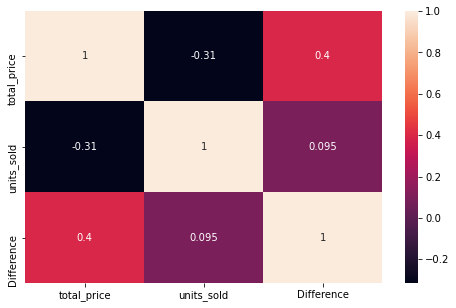

In [66]:
#Checking the correlation of train after droping the base_price feature

plt.figure(figsize=(8,5))
sns.heatmap( data = train.corr(), annot = True )

<AxesSubplot:>

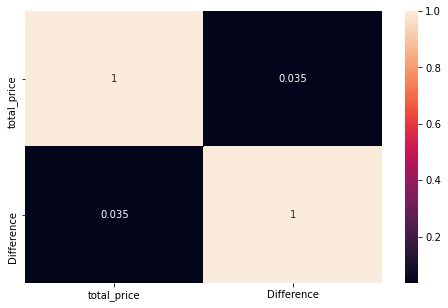

In [67]:
#Checking the correlation of test after droping the base_price feature

plt.figure(figsize=(8,5))
sns.heatmap( data = test.corr(), annot = True )

### Feature Engineering

In [68]:
# Encoding the categorical features on both train and test
one_hot_encoded_train = pd.get_dummies(train[['store_id','sku_id']], drop_first = True)

one_hot_encoded_test = pd.get_dummies(test[['store_id','sku_id']], drop_first = True)



# Droping the existing features
train.drop(['week','store_id','sku_id'],axis=1,inplace=True)
test.drop(['week','store_id','sku_id'],axis=1,inplace=True)

In [69]:
train.head(5)

,total_price,is_featured_sku,is_display_sku,units_sold,Is_weekend,Difference
0,99.0375,0,0,2.995732,0,12.825
1,99.0375,0,0,3.332205,0,0.000
2,133.9500,0,0,2.944439,0,0.000
3,133.9500,0,0,3.784190,0,0.000
4,141.0750,0,0,3.951244,0,0.000


In [70]:
test.head()

,total_price,is_featured_sku,is_display_sku,Is_weekend,Difference
0,108.3000,0,0,0,0.0
1,109.0125,0,0,0,0.0
2,133.9500,0,0,0,0.0
3,133.9500,0,0,0,0.0
4,176.7000,0,0,0,0.0


In [71]:
print(train.shape)
print(test.shape)

(150150, 6)
(13860, 5)


In [72]:
print(one_hot_encoded_train.shape[1])
print(one_hot_encoded_test.shape[1])

102
102


In [73]:
#Creating a new data frame with only numerical feature for scaling
numerical_train = train[['total_price','Difference']]

numerical_test = test[['total_price','Difference']]

In [74]:
#Scaling the features using min-max method (normalizarion)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_columns_train = scaler.fit_transform(numerical_train)
scaled_columns_train = pd.DataFrame(scaled_columns_train, columns=['total_price','difference'])
scaled_columns_train.head()

#Droping the existing feature
train.drop(['total_price','Difference'],axis=1,inplace=True)


scaler = MinMaxScaler()
scaled_columns_test = scaler.fit_transform(numerical_test)
scaled_columns_test = pd.DataFrame(scaled_columns_test, columns=['total_price','difference'])

test.drop(['total_price','Difference'],axis=1,inplace=True)
scaled_columns_test.head()

,total_price,difference
0,0.131291,0.157407
1,0.133479,0.157407
2,0.210066,0.157407
3,0.210066,0.157407
4,0.341357,0.157407


In [75]:
print(scaled_columns_train.shape)
print(scaled_columns_test.shape)

(150150, 2)
(13860, 2)


In [76]:
# Joining all the scaled and encoded features into sinle data frame

train=pd.concat([train,scaled_columns_train,one_hot_encoded_train],axis=1)
test=pd.concat([test,scaled_columns_test,one_hot_encoded_test],axis=1)

In [77]:
#Shape of both train and test data

print('Shape of train data: ' ,train.shape)
print('Shape of test data: ', test.shape)


Shape of train data:  (150150, 108)
Shape of test data:  (13860, 107)


# Model Building

In [78]:
#Separating the independent and dependent varaiables

X = train.drop(['units_sold'],axis=1)
y = train['units_sold']

In [79]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [80]:
# Splitting train data into further train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 1, test_size = 0.30)

In [81]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)

Shape of X_train:  (105105, 107)
Shape of X_test:  (45045, 107)


In [82]:
# Range of the target variable

print('min:',min(Y_train),"   ",'max:',max(Y_train))

min: 0.0     max: 7.964155718840937


# Linear Regression

In [83]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, Y_train)

LinearRegression()

In [84]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [85]:
np.exp(y_pred)[0:100]

array([ 99.67056599,  59.54333781,  73.3212594 ,  73.49236668,
        55.89759025,  37.51004033,  45.04783053,  29.61928792,
        15.75127312,  36.47004731,  12.3849147 , 109.78390738,
        40.60850444,  46.31776709,  25.63684607,  32.9944569 ,
       101.70026509,  17.69639308,  67.62728379,  37.80186744,
        22.23581502,  18.3139458 , 166.64186877,  16.29989151,
        21.30023706,  27.37465961,  12.35270104,  35.90115179,
         9.03116171,  60.72178072, 176.95741845,  26.78877097,
        30.14762516,  63.46840342,  47.53631667,  65.96884668,
        39.85886805,  21.71034352,  38.72558176,  31.52263493,
        61.79271352,  25.41839285,  33.89333742,  22.21386709,
        55.88496367,  21.13443331,  22.53150647,  35.06483857,
        41.6034885 , 182.88453938,  31.59341221,  45.31228628,
        27.76347927,  42.10545575,  22.76706865,  44.27776982,
        36.83932051,  35.73609674,  71.79582794,  20.16551494,
        16.23372486,  56.88172238, 117.69135059,  30.85

### Note : Since we transformed the target variable using log we need to take antilog of both actual y value and predicted y value to perform model evaluation

we can just do exponensial of the log value to undo the log

In [86]:
from sklearn import metrics

# Model Evaluation
print('R^2:',metrics.r2_score(np.exp(Y_train), np.exp(y_pred)))
print('Adjusted R^2:',1 - (1-metrics.r2_score(np.exp(Y_train), np.exp(y_pred)))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print()
print('---------------------------')
print()

# Calculating 100 * RMSLE value
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(np.exp(Y_train), np.exp(y_pred))))

R^2: 0.6370870711786546
Adjusted R^2: 0.6367172350558712

---------------------------

RMSLE: 52.034589850149395


### RMSLE on train  is : 52.03

In [87]:
# Model prediction on test data
y_pred = lm.predict(X_test)

In [88]:
# Model Evaluation
print('R^2:',metrics.r2_score(np.exp(Y_test), np.exp(y_pred)))
print('Adjusted R^2:',1 - (1-metrics.r2_score(np.exp(Y_test), np.exp(y_pred)))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print()
print('---------------------------')
print()
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(np.exp(Y_test), np.exp(y_pred))))

R^2: 0.617752956675687
Adjusted R^2: 0.6168427839085753

---------------------------

RMSLE: 51.98541105891999


### RMSLE on test is : 51.98

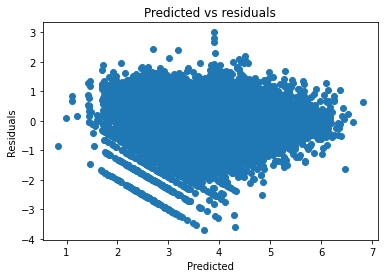

In [89]:
# Checking residuals
plt.scatter(y_pred,Y_test-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

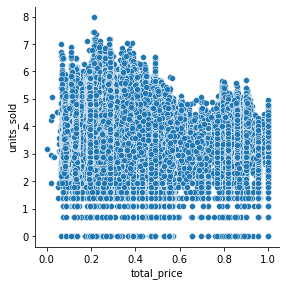

In [90]:
sns.pairplot(train, x_vars=['total_price'], y_vars='units_sold', height=4, aspect=1, kind='scatter')
plt.show()

# Summary

In [91]:
# There is no linear relationship between independent and dependent varaible in this data
# Our first assumption in linear regression itself is independent and dependent varaibel should have a linear relationship
# which this data fails to satisfy
# Even with some feature transformation this data is not suitable for linear regression
# Still we got the rmsle value of 52 on train and 51 on test

# Predicting the value for the given test data

In [92]:
# Model prediction on train data
y_pred = lm.predict(test)

In [93]:
np.exp(y_pred)[0:100]

array([ 33.12270994,  27.57069819,  15.16603065,  24.76103335,
        23.10802663,  37.62654323,  13.91254787,  21.11973476,
        15.61968135, 101.93118356,  85.32555128,  47.37078052,
        47.46828428,  77.49976225,  72.32600292,  68.96931067,
       131.83435227,  43.30002467, 312.25468856,  35.96239826,
        46.34392687,  53.59591528,  65.73095341,  56.61183565,
        42.15567115,  57.6449203 ,  25.00775739, 117.92533245,
        98.40770866,  33.27122135,  11.00904763,  29.61480934,
        46.74175101,  43.86813842,  34.36105265,  38.19116317,
        40.10039495,  81.7869218 ,  28.90647589, 184.91106661,
        18.10710384,  16.27391889,  35.9822925 ,  36.84027029,
        29.98877887,  27.13280018,  25.13971495,  56.80116574,
        12.03577411,  25.23088039,  41.63580358,  88.98006746,
        45.2986781 ,  33.77163875,  42.50140503,  15.87533184,
        17.92182421,  69.59609662,  24.45941323, 127.80838597,
        16.76880093,  13.16260861,  26.59111325,  34.11

### Note : Since we transformed the target variable using log we need to take antilog of predicted y value to perform model evaluation

we can just do exponensial of the log value to undo the log

In [94]:
#updating the predicted values on the test dataframe

test['y_pred'] = np.exp(y_pred)

test.head()

,is_featured_sku,is_display_sku,Is_weekend,total_price,difference,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,...,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,y_pred
0,0,0,0,0.131291,0.157407,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,33.122710
1,0,0,0,0.133479,0.157407,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,27.570698
2,0,0,0,0.210066,0.157407,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15.166031
3,0,0,0,0.210066,0.157407,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,24.761033
4,0,0,0,0.341357,0.157407,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,23.108027


### Predicted target value on the given test data and joined the predicted target to the test DataFrame

In [95]:
#Predicted target value on the given test data

test['y_pred']

0        33.122710
1        27.570698
2        15.166031
3        24.761033
4        23.108027
           ...    
13855    29.204302
13856    22.852403
13857    35.737671
13858     9.541091
13859     8.288841
Name: y_pred, Length: 13860, dtype: float64

In [96]:
# Model Evaluation

# since the test data target varaible is not given model evaluation for given test data is not computed
